# Python4DS Quick Review - 7
Based on:
- Kaggle Python Course, and 
- Free book: [A Whirlwind Tour of Python by Jake VanderPlas (O’Reilly)](https://jakevdp.github.io/WhirlwindTourOfPython/). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1.

In this lesson, I'll be talking about **imports** in Python, giving some tips for working with unfamiliar libraries (and the objects they return), digging into the guts of Python just a bit to talk about **operator overloading**, and a quick preview of main libraries used with Data Science.

# Imports

So far we've talked about types and functions which are built-in to the language. 

But one of the best things about Python (especially if you're a data scientist) is the vast number of high-quality custom libraries that have been written for it. 

Some of these libraries are in the "standard library", meaning you can find them anywhere you run Python. Others libraries can be easily added, even if they aren't always shipped with Python.

## Importing from Third-Party Modules

One of the things that makes Python useful, especially within the world of data science, is its ecosystem of third-party modules.
These can be imported just as the built-in modules, but first the modules must be installed on your system.
The standard registry for such modules is the Python Package Index (*PyPI* for short), found on the Web at http://pypi.python.org/.
For convenience, Python comes with a program called ``pip`` (a recursive acronym meaning "pip installs packages"), which will automatically fetch packages released and listed on PyPI. For example, if you'd like to install the ``numpy``, all that is required is to type the following at the command line in your Terminal:
- `pip install numpy` 

The source code for the package will be automatically downloaded from the PyPI repository, and the package installed in the standard Python path (assuming you have permission to do so on the computer you're using).

For more information about PyPI and the ``pip`` installer, refer to the documentation at http://pypi.python.org/.

## Importing from Python's Standard Library

Python's standard library contains many useful built-in modules, which you can read about fully in [Python's documentation](https://docs.python.org/3/library/).
Any of these can be imported with the ``import`` statement, and then explored using the help function seen in the previous section.
Here is an extremely incomplete list of some of the modules you might wish to explore and learn about:

- ``os`` and ``sys``: Tools for interfacing with the operating system, including navigating file directory structures and executing shell commands
- ``math`` and ``cmath``: Mathematical functions and operations on real and complex numbers
- ``itertools``: Tools for constructing and interacting with iterators and generators
- ``functools``: Tools that assist with functional programming
- ``random``: Tools for generating pseudorandom numbers
- ``pickle``: Tools for object persistence: saving objects to and loading objects from disk
- ``json`` and ``csv``: Tools for reading JSON-formatted and CSV-formatted files.
- ``urllib``: Tools for doing HTTP and other web requests.

You can find information on these, and many more, in the Python standard library documentation: https://docs.python.org/3/library/.

Either way, we'll access this code with **imports**.

We'll start our example by importing `math` from the standard library.

In [1]:
import math

print("It's math! It has type {}".format(type(math)))

It's math! It has type <class 'module'>


`math` is a module. A module is just a collection of variables (a *namespace*, if you like) defined by someone else. We can see all the names in `math` using the built-in function `dir()`.

In [2]:
print(dir(math))

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


We can access these variables using dot syntax. Some of them refer to simple values, like `math.pi`:

In [3]:
print("pi to 4 significant digits = {:.4}".format(math.pi))

pi to 4 significant digits = 3.142


But most of what we'll find in the module are functions, like `math.log`:

In [4]:
math.log(32, 2)

5.0

Of course, if we don't know what `math.log` does, we can call `help()` on it:

In [5]:
help(math.log)

Help on built-in function log in module math:

log(...)
    log(x, [base=math.e])
    Return the logarithm of x to the given base.
    
    If the base not specified, returns the natural logarithm (base e) of x.



We can also call `help()` on the module itself. This will give us the combined documentation for *all* the functions and values in the module (as well as a high-level description of the module). Click the "output" button to see the whole `math` help page.

In [6]:
help(math)

Help on module math:

NAME
    math

MODULE REFERENCE
    https://docs.python.org/3.7/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
    

### Other import syntax

If we know we'll be using functions in `math` frequently we can import it under a shorter alias to save some typing (though in this case "math" is already pretty short).

In [6]:
import math as mt
mt.pi

3.141592653589793

> You may have seen code that does this with certain popular libraries like Pandas, Numpy, Tensorflow, or Matplotlib. For example, it's a common convention to `import numpy as np` and `import pandas as pd`.

The `as` simply renames the imported module. It's equivalent to doing something like:

In [7]:
import math
mt = math

Wouldn't it be great if we could refer to all the variables in the `math` module by themselves? i.e. if we could just refer to `pi` instead of `math.pi` or `mt.pi`? Good news: we can do that.

In [8]:
from math import *
print(pi, log(32, 2))

3.141592653589793 5.0


`import *` makes all the module's variables directly accessible to you (without any dotted prefix).

Bad news: some purists might grumble at you for doing this.

Worse: they kind of have a point.

In [9]:
from math import *
from numpy import *
print(pi, log(32, 2))

TypeError: return arrays must be of ArrayType

What the what? But it worked before!

These kinds of "star imports" can occasionally lead to weird, difficult-to-debug situations.

The problem in this case is that the `math` and `numpy` modules both have functions called `log`, but they have different semantics. Because we import from `numpy` second, its `log` overwrites (or "shadows") the `log` variable we imported from `math`.

A good compromise is to import only the specific things we'll need from each module:

In [15]:
from math import log, pi
from numpy import asarray

### Submodules

We've seen that modules contain variables which can refer to functions or values. Something to be aware of is that they can also have variables referring to *other modules*. 

In [16]:
import numpy
print("numpy.random is a", type(numpy.random))
print("it contains names such as...",
      dir(numpy.random)[-15:]
     )

numpy.random is a <class 'module'>
it contains names such as... ['seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']


So if we import `numpy` as above, then calling a function in the `random` "submodule" will require *two* dots.

In [17]:
# Roll 10 dice
rolls = numpy.random.randint(low=1, high=6, size=10)
rolls

array([4, 4, 5, 1, 5, 4, 3, 1, 4, 3])

Oh the places you'll go, oh the objects you'll see

So after 6 lessons, you're a pro with ints, floats, bools, lists, strings, and dicts (right?). 

Even if that were true, it doesn't end there. As you work with various libraries for specialized tasks, you'll find that they define their own types which you'll have to learn to work with. For example, if you work with the graphing library `matplotlib`, you'll be coming into contact with objects it defines which represent Subplots, Figures, TickMarks, and Annotations. `pandas` functions will give you DataFrames and Series. 

In this section, I want to share with you a quick survival guide for working with strange types.

### Three tools for understanding strange objects

In the cell above, we saw that calling a `numpy` function gave us an "array". We've never seen anything like this before (not in this course anyways). But don't panic: we have three familiar builtin functions to help us here.

**1: `type()`** (what is this thing?)

In [18]:
type(rolls)

numpy.ndarray

**2: `dir()`** (what can I do with it?)

In [19]:
print(dir(rolls))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

In [20]:
# What am I trying to do with this dice roll data? Maybe I want the average roll, in which case the "mean"
# method looks promising...
rolls.mean()

3.4

In [21]:
# Or maybe I just want to get back on familiar ground, in which case I might want to check out "tolist"
rolls.tolist()

[4, 4, 5, 1, 5, 4, 3, 1, 4, 3]

**3: `help()`** (tell me more)

In [22]:
# That "ravel" attribute sounds interesting. I'm a big classical music fan.
help(rolls.ravel)

Help on built-in function ravel:

ravel(...) method of numpy.ndarray instance
    a.ravel([order])
    
    Return a flattened array.
    
    Refer to `numpy.ravel` for full documentation.
    
    See Also
    --------
    numpy.ravel : equivalent function
    
    ndarray.flat : a flat iterator on the array.



In [19]:
# Okay, just tell me everything there is to know about numpy.ndarray
# (Click the "output" button to see the novel-length output)
help(rolls)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

(Of course, you might also prefer to check out [the online docs](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.html))

### Operator overloading

What's the value of the below expression?

In [23]:
[3, 4, 1, 2, 2, 1] + 10

TypeError: can only concatenate list (not "int") to list

What a silly question. Of course it's an error. 

But what about...

In [24]:
rolls + 10

array([14, 14, 15, 11, 15, 14, 13, 11, 14, 13])

We might think that Python strictly polices how pieces of its core syntax behave such as `+`, `<`, `in`, `==`, or square brackets for indexing and slicing. But in fact, it takes a very hands-off approach. When you define a new type, you can choose how addition works for it, or what it means for an object of that type to be equal to something else.

The designers of lists decided that adding them to numbers wasn't allowed. The designers of `numpy` arrays went a different way (adding the number to each element of the array).

Here are a few more examples of how `numpy` arrays interact unexpectedly with Python operators (or at least differently from lists).

In [25]:
# At which indices are the dice less than or equal to 3?
rolls <= 3

array([False, False, False,  True, False, False,  True,  True, False,
        True])

In [26]:
xlist = [[1,2,3],[2,4,6],]

# Create a 2-dimensional array
x = numpy.asarray(xlist)

print("xlist = {}\nx =\n{}".format(xlist, x))

xlist = [[1, 2, 3], [2, 4, 6]]
x =
[[1 2 3]
 [2 4 6]]


In [29]:
# Get the last element of the second row of our numpy array
x[1,-1]

6

In [30]:
# Get the last element of the second sublist of our nested list?
xlist[1,-1]

TypeError: list indices must be integers or slices, not tuple

numpy's `ndarray` type is specialized for working with multi-dimensional data, so it defines its own logic for indexing, allowing us to index by a tuple to specify the index at each dimension.

**When does 1 + 1 not equal 2?**

Things can get weirder than this. You may have heard of (or even used) tensorflow, a Python library popularly used for deep learning. It makes extensive use of operator overloading. You will cover it later when studyng Deep Learning. 

It's important just to be aware of the fact that this sort of thing is possible and that libraries will often use operator overloading in non-obvious or magical-seeming ways.

Understanding how Python's operators work when applied to ints, strings, and lists is no guarantee that you'll be able to immediately understand what they do when applied to a tensorflow `Tensor`, or a numpy `ndarray`, or a pandas `DataFrame`.

Once you've had a little taste of DataFrames, for example, an expression like the one below starts to look appealingly intuitive:

```python
# Get the rows with population over 1m in South America
df[(df['population'] > 10**6) & (df['continent'] == 'South America')]
```

But why does it work? The example above features something like **5** different overloaded operators. What's each of those operations doing? It can help to know the answer when things start going wrong.

# A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview several of the more important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment, you can install the relevant packages with the following command at your Terminal:

- `conda install numpy scipy pandas matplotlib scikit-lear`

Otherwise, use PIP 

Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [31]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [32]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Compare this with the much more verbose Python-style list comprehension for the same result:

In [33]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a 3x3 array:

In [34]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [35]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [36]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [37]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

For more information on NumPy, see [NumPy.org](https://numpy.org).

## Pandas: Labeled Column-oriented Data

Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R and related languages.
DataFrames in Pandas look something like this:

In [38]:
import pandas as pd

df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [39]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

Apply string operations across string entries:

In [41]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

Apply aggregates across numerical entries:

In [42]:
df['value'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [43]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

For more information on using Pandas, see [Pandas](https://pandas.pydata.org) and the great tutorial: [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min).

## Matplotlib MatLab-style scientific visualization

Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

In [44]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let's create some data (as NumPy arrays, of course) and plot the results:

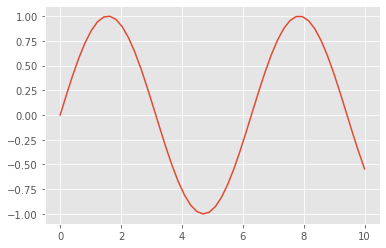

In [45]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](https://matplotlib.org/stable/).

## SciPy: Scientific Python

SciPy is a collection of scientific functionality that is built on NumPy.
The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there.
The package is arranged as a set of submodules, each implementing some class of numerical algorithms.
Here is an incomplete sample of some of the more important ones for data science:

- ``scipy.fftpack``: Fast Fourier transforms
- ``scipy.integrate``: Numerical integration
- ``scipy.interpolate``: Numerical interpolation
- ``scipy.linalg``: Linear algebra routines
- ``scipy.optimize``: Numerical optimization of functions
- ``scipy.sparse``: Sparse matrix storage and linear algebra
- ``scipy.stats``: Statistical analysis routines
- ``scipy.signal``: Signal Processing (as filtering)

For example, let's take a look at interpolating a smooth curve between some data

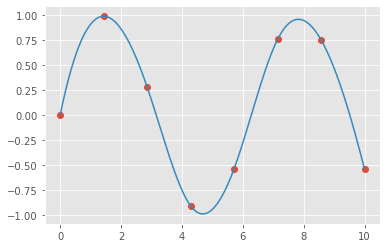

In [46]:
from scipy import interpolate

# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

What we see is a smooth interpolation between the points.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.

# Exercises

## 1.

Create a Notebook (using Pandas) where you, starting from a dataset of your choice, analise it, cleaning it if necessary and finally add some visualizations with matPlotLib. 